In [1]:
import psycopg2
import pandas as pd

# Database connection parameters
db_params = {
    'dbname': 'everything2024',
    'user': 'efc0169',
    'password': 'TonySWY2020@',
    'host': 'pg.mlds.northwestern.edu',
    'port': '5432'  
}

# Connect to the database
try:
    connection = psycopg2.connect(**db_params)
    print("Database connection successful")

    # Query to fetch data from the movie table
    query = "SELECT * FROM mlds422.movies;"

    # Fetch data into a DataFrame
    movie_df = pd.read_sql_query(query, connection)

    # Display the first few rows of the DataFrame
    print(movie_df.head())

except Exception as e:
    print(f"Error: {e}")

finally:
    # Close the connection
    if connection:
        connection.close()
        print("Database connection closed")


Database connection successful


/var/folders/nc/lyhmm5512tddy5bs9wt4bb740000gn/T/ipykernel_61145/3078856466.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  movie_df = pd.read_sql_query(query, connection)


   movie_id                                        movie_title  \
0         1  Percy Jackson & the Olympians: The Lightning T...   
1         2                                        Please Give   
2         3                                                 10   
3         4                    12 Angry Men (Twelve Angry Men)   
4         5                       20,000 Leagues Under The Sea   

                                          movie_info rating  \
0  A teenager discovers he's the descendant of a ...     PG   
1  Kate has a lot on her mind. There's the ethics...      R   
2  Blake Edwards' 10 stars Dudley Moore as George...      R   
3  A Puerto Rican youth is on trial for murder, a...   None   
4  This 1954 Disney version of Jules Verne's 20,0...      G   

                                               genre          directors  \
0  Action & Adventure, Comedy, Drama, Science Fic...     Chris Columbus   
1                                             Comedy  Nicole Holofcener   

In [2]:
movie_df.dtypes

movie_id                int64
movie_title            object
movie_info             object
rating                 object
genre                  object
directors              object
in_theaters_date       object
on_streaming_date      object
runtime_in_minutes    float64
critic_rating           int64
critic_count            int64
audience_rating       float64
audience_count        float64
dtype: object

In [3]:
movie_df

,movie_id,movie_title,movie_info,rating,genre,directors,in_theaters_date,on_streaming_date,runtime_in_minutes,critic_rating,critic_count,audience_rating,audience_count
0,1,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,2010-02-12,2010-06-29,83.0,49,144,53.0,254287.0
1,2,Please Give,Kate has a lot on her mind. There's the ethics...,R,Comedy,Nicole Holofcener,2010-04-30,2010-10-19,90.0,86,140,64.0,11567.0
2,3,10,Blake Edwards' 10 stars Dudley Moore as George...,R,"Comedy, Romance",Blake Edwards,1979-10-05,1997-08-27,118.0,68,22,53.0,14670.0
3,4,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",None,"Classics, Drama",Sidney Lumet,2057-04-13,2001-03-06,95.0,100,51,97.0,105000.0
4,5,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,2054-01-01,2003-05-20,127.0,89,27,74.0,68860.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16633,16633,Zoom,Former superhero Jack is called back to work t...,PG,"Action & Adventure, Comedy, Kids & Family",Peter Hewitt,2006-08-11,2007-09-02,88.0,3,66,33.0,11327.0
16634,16635,Zootopia,The modern mammal metropolis of Zootopia is a ...,PG,"Action & Adventure, Animation, Comedy","Byron Howard, Rich Moore, Jared Bush",2016-03-04,2016-06-07,108.0,97,279,92.0,100946.0
16635,16636,Zorba the Greek,If ever there was a role that Anthony Quinn wa...,None,"Action & Adventure, Art House & International,...",None,2064-12-17,2004-08-03,142.0,78,9,87.0,7126.0
16636,16637,Zulu,"Filmed on a grand scale, Zulu is a rousing rec...",PG,"Classics, Drama","Cy Endfield, Cyril Endfield",2064-06-17,2001-02-02,139.0,95,21,91.0,30170.0


In [4]:
movie_df['in_theaters_date'] = pd.to_datetime(movie_df['in_theaters_date'], format='%Y-%m-%d')
movie_df['on_streaming_date'] = pd.to_datetime(movie_df['in_theaters_date'], format='%Y-%m-%d')

In [5]:
na_rows = movie_df[movie_df.isna().any(axis=1)]
na_rows

,movie_id,movie_title,movie_info,rating,genre,directors,in_theaters_date,on_streaming_date,runtime_in_minutes,critic_rating,critic_count,audience_rating,audience_count
3,4,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",None,"Classics, Drama",Sidney Lumet,2057-04-13,2057-04-13,95.0,100,51,97.0,105000.0
6,7,The 39 Steps,A man in London tries to help a counterespiona...,None,"Action & Adventure, Classics, Mystery & Suspense",Alfred Hitchcock,2035-08-01,2035-08-01,87.0,96,47,86.0,23827.0
7,8,3:10 to Yuma,"Desperate for money, frontier rancher Van Hefl...",None,"Classics, Drama, Western",Delmer Daves,2057-08-07,2057-08-07,92.0,96,27,78.0,9224.0
9,10,Abraham Lincoln,"To date, this D.W. Griffith epic is the only t...",None,"Classics, Drama",D.W. Griffith,2030-11-08,2030-11-08,97.0,90,10,38.0,455.0
14,14,The Breaking Point,In this taut adaptation of Hemingway's To Have...,None,Drama,Michael Curtiz,2050-10-06,2050-10-06,97.0,100,7,84.0,328.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16617,16617,Zerophilia,A young man who remains decidedly insecure abo...,None,"Art House & International, Comedy, Drama",Martin Curland,2005-10-26,2005-10-26,90.0,25,20,61.0,1628.0
16618,16618,Zeus and Roxanne,"In a Bahamian resort, marine researcher Mary B...",PG,"Action & Adventure, Comedy, Kids & Family",None,1997-01-24,1997-01-24,98.0,44,9,42.0,8967.0
16619,16619,Ziegfeld Follies,"In this film, we meet the legendary showman Fl...",None,"Classics, Musical & Performing Arts","Vincente Minnelli, Lemuel Ayers, Charles Walte...",NaT,NaT,109.0,67,9,59.0,2874.0
16621,16621,Zindagi Na Milegi Dobara,Kabir has just met Natasha. Six months later t...,None,"Art House & International, Comedy, Drama",Zoya Akhtar,2011-05-27,2011-05-27,148.0,91,11,86.0,3858.0


# 2.1

In [6]:
# Extract year from the 'in_theaters_date' column
movie_df['release_year'] = movie_df['in_theaters_date'].dt.year

# Count the number of movies released each year
movies_per_year = movie_df['release_year'].value_counts().sort_index()
movies_per_year


release_year
1970.0    62
1971.0    67
1972.0    70
1973.0    81
1974.0    63
          ..
2065.0    55
2066.0    56
2067.0    65
2068.0    59
2069.0    56
Name: count, Length: 100, dtype: int64

The release year cannot beyond today's year. And I can see a great decrease from 2019 after. After checking the release year, I found out that it is incorrectly adding 100 years. The correct year should minus 100 years. Therefore, it is better to minus 100 of these years.

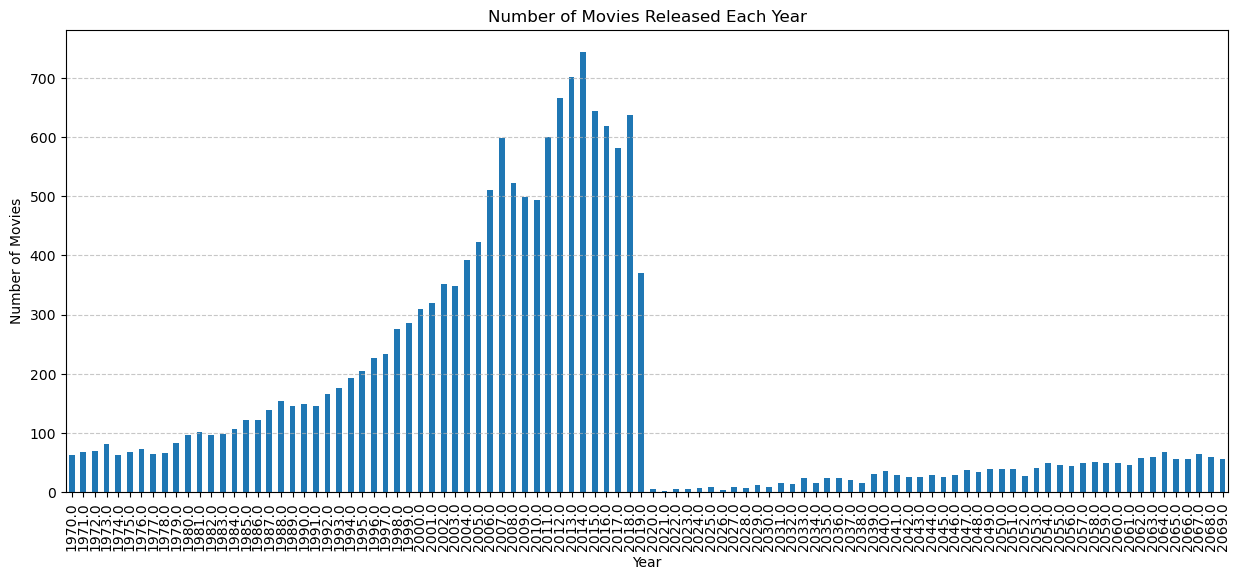

In [7]:
import matplotlib.pyplot as plt
# Plot the number of movies released each year
plt.figure(figsize=(15, 6))
movies_per_year.plot(kind='bar')
plt.title('Number of Movies Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [8]:
# Define a function to deduct 100 years from a datetime if the release_year is greater than 2019
def adjust_dates(row):
    if row['release_year'] > 2019:
        row['in_theaters_date'] = row['in_theaters_date'] - pd.DateOffset(years=100)
        row['on_streaming_date'] = row['on_streaming_date'] - pd.DateOffset(years=100)
    return row

# Apply the function to the DataFrame
movie_df_new = movie_df.apply(adjust_dates, axis=1)

# Verify the result
movie_df_new


,movie_id,movie_title,movie_info,rating,genre,directors,in_theaters_date,on_streaming_date,runtime_in_minutes,critic_rating,critic_count,audience_rating,audience_count,release_year
0,1,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,2010-02-12,2010-02-12,83.0,49,144,53.0,254287.0,2010.0
1,2,Please Give,Kate has a lot on her mind. There's the ethics...,R,Comedy,Nicole Holofcener,2010-04-30,2010-04-30,90.0,86,140,64.0,11567.0,2010.0
2,3,10,Blake Edwards' 10 stars Dudley Moore as George...,R,"Comedy, Romance",Blake Edwards,1979-10-05,1979-10-05,118.0,68,22,53.0,14670.0,1979.0
3,4,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",None,"Classics, Drama",Sidney Lumet,1957-04-13,1957-04-13,95.0,100,51,97.0,105000.0,2057.0
4,5,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,1954-01-01,1954-01-01,127.0,89,27,74.0,68860.0,2054.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16633,16633,Zoom,Former superhero Jack is called back to work t...,PG,"Action & Adventure, Comedy, Kids & Family",Peter Hewitt,2006-08-11,2006-08-11,88.0,3,66,33.0,11327.0,2006.0
16634,16635,Zootopia,The modern mammal metropolis of Zootopia is a ...,PG,"Action & Adventure, Animation, Comedy","Byron Howard, Rich Moore, Jared Bush",2016-03-04,2016-03-04,108.0,97,279,92.0,100946.0,2016.0
16635,16636,Zorba the Greek,If ever there was a role that Anthony Quinn wa...,None,"Action & Adventure, Art House & International,...",None,1964-12-17,1964-12-17,142.0,78,9,87.0,7126.0,2064.0
16636,16637,Zulu,"Filmed on a grand scale, Zulu is a rousing rec...",PG,"Classics, Drama","Cy Endfield, Cyril Endfield",1964-06-17,1964-06-17,139.0,95,21,91.0,30170.0,2064.0


2.2

In [9]:
# Filter movies released before 2010
pre_2010_movies = movie_df[movie_df['release_year'] < 2010]
# Top 5 movies by critic_rating
top_5_critic = pre_2010_movies.sort_values(by='critic_rating', ascending=False).head(5)

# Display top 5 critic-rated movies
print("Top 5 Movies by Critic Rating:")
print(top_5_critic[['movie_title', 'critic_rating']])


Top 5 Movies by Critic Rating:
                 movie_title  critic_rating
8449             Men at Work            100
8683               Kwik Stop            100
15205   36 quai des orfevres            100
13499  Taxi to the Dark Side            100
8685          The Confession            100


In [10]:
# Top 5 movies by audience_rating
top_5_audience = pre_2010_movies.sort_values(by='audience_rating', ascending=False).head(5)

# Display top 5 audience-rated movies
print("Top 5 Movies by Audience Rating:")
print(top_5_audience[['movie_title', 'audience_rating']])

Top 5 Movies by Audience Rating:
                    movie_title  audience_rating
222             Prima Ballerina            100.0
1846                 Ice People            100.0
1283       La Ciudad (The City)            100.0
3229      Been Rich All My Life            100.0
12463  The Shawshank Redemption             98.0


2.3

In [11]:
# Calculate the average number of audience reviews
avg_audience_reviews = pre_2010_movies['audience_count'].mean()

# Filter movies with audience reviews greater than the average
popular_movies = pre_2010_movies[pre_2010_movies['audience_count'] > avg_audience_reviews]

# Display the popular movies DataFrame
print(popular_movies)

       movie_id                 movie_title  \
5             6                 10,000 B.C.   
53           51                      Aliens   
88           85               The Happening   
95          144                     The Box   
97           94  Disney's A Christmas Carol   
...         ...                         ...   
16588     16588          Yours, Mine & Ours   
16595     16595             You've Got Mail   
16623     16623                      Zodiac   
16627     16627                  Zombieland   
16631     16631                   Zoolander   

                                              movie_info rating  \
5      A young outcast from a primitive tribe is forc...  PG-13   
53     Big-budget special effects, swiftly paced acti...      R   
88     The Happening' is a lightning-paced, heart-pou...      R   
95     Norma and Arthur Lewis are a suburban couple w...  PG-13   
97     Ebenezer Scrooge begins the Christmas holiday ...     PG   
...                              

In [12]:
# Top 5 movies by critic_rating
top_5_critic = popular_movies.sort_values(by='critic_rating', ascending=False).head(5)

# Display top 5 critic-rated movies
print("Top 5 Popular Movies by Critic Rating:")
print(top_5_critic[['movie_title', 'critic_rating']])


Top 5 Popular Movies by Critic Rating:
          movie_title  critic_rating
15439       Toy Story            100
13557  The Terminator            100
15440     Toy Story 2            100
53             Aliens             99
6139     Finding Nemo             99


In [13]:
# Top 5 movies by audience_rating
top_5_audience = popular_movies.sort_values(by='audience_rating', ascending=False).head(5)

# Display top 5 audience-rated movies
print("Top 5 Popular Movies by Audience Rating:")
print(top_5_audience[['movie_title', 'audience_rating']])

Top 5 Popular Movies by Audience Rating:
                                          movie_title  audience_rating
12463                        The Shawshank Redemption             98.0
6747                                    The Godfather             98.0
6748                           The Godfather, Part II             97.0
851                                        GoodFellas             97.0
5706   Star Wars: Episode V - The Empire Strikes Back             97.0


2.4

In [14]:
# Calculate the percentage of movies for each rating
rating_percentage = (popular_movies['rating'].value_counts(normalize=True) * 100).sort_index()

# Display the percentages
print("Percentage of Movies by Rating:")
print(rating_percentage)


Percentage of Movies by Rating:
rating
G         4.863582
PG       20.166074
PG-13    43.653618
R        31.316726
Name: proportion, dtype: float64


PG-13 movies dominate (43.65%), reflecting their broad appeal to teens and adults, while R-rated films (31.32%) show strong demand for mature content. PG movies (20.17%) cater to family audiences, whereas G-rated films (4.86%) are rare, indicating a shift away from purely child-focused entertainment. This highlights the industry's focus on maximizing reach with PG-13 and niche appeal with R-rated content.

In [15]:
# Group by 'rating' and calculate the mean critic and audience ratings
average_ratings = popular_movies.groupby('rating')[['critic_rating', 'audience_rating']].mean()

# Display the average ratings
print("Average Critic and Audience Ratings by Rating:")
print(average_ratings)


Average Critic and Audience Ratings by Rating:
        critic_rating  audience_rating
rating                                
G           73.512195        73.195122
PG          59.652941        65.870588
PG-13       49.926630        63.086957
R           61.121212        70.821970


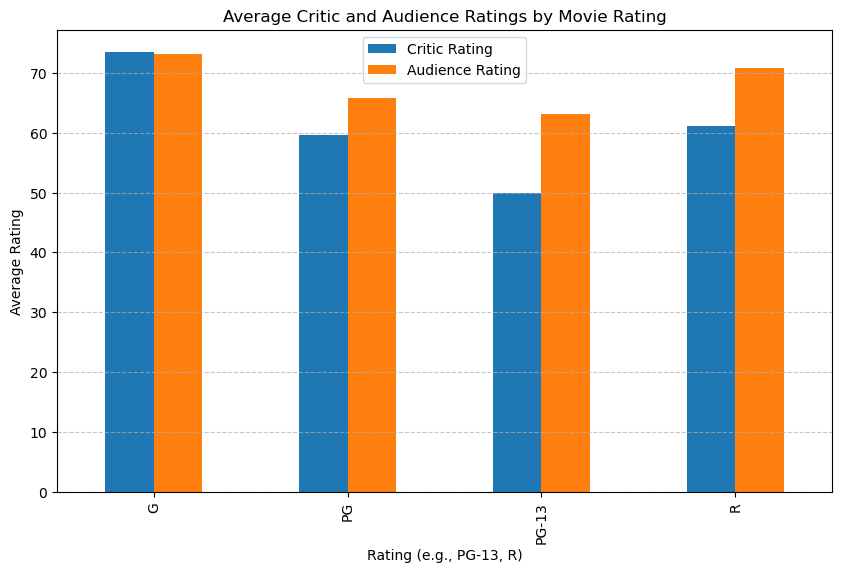

In [16]:
# Plot the average critic and audience ratings by rating
average_ratings.plot(kind='bar', figsize=(10, 6))
plt.title('Average Critic and Audience Ratings by Movie Rating')
plt.xlabel('Rating (e.g., PG-13, R)')
plt.ylabel('Average Rating')
plt.legend(['Critic Rating', 'Audience Rating'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Critics favor G-rated movies (73.51), while audiences rate R-rated films the highest (70.82), suggesting differing preferences between groups. PG and PG-13 movies receive moderate scores, with audience ratings consistently higher than critic ratings, indicating broader appeal to general viewers despite critical reservations. This highlights a divergence in critical acclaim versus audience enjoyment, especially for R-rated content.

2.5

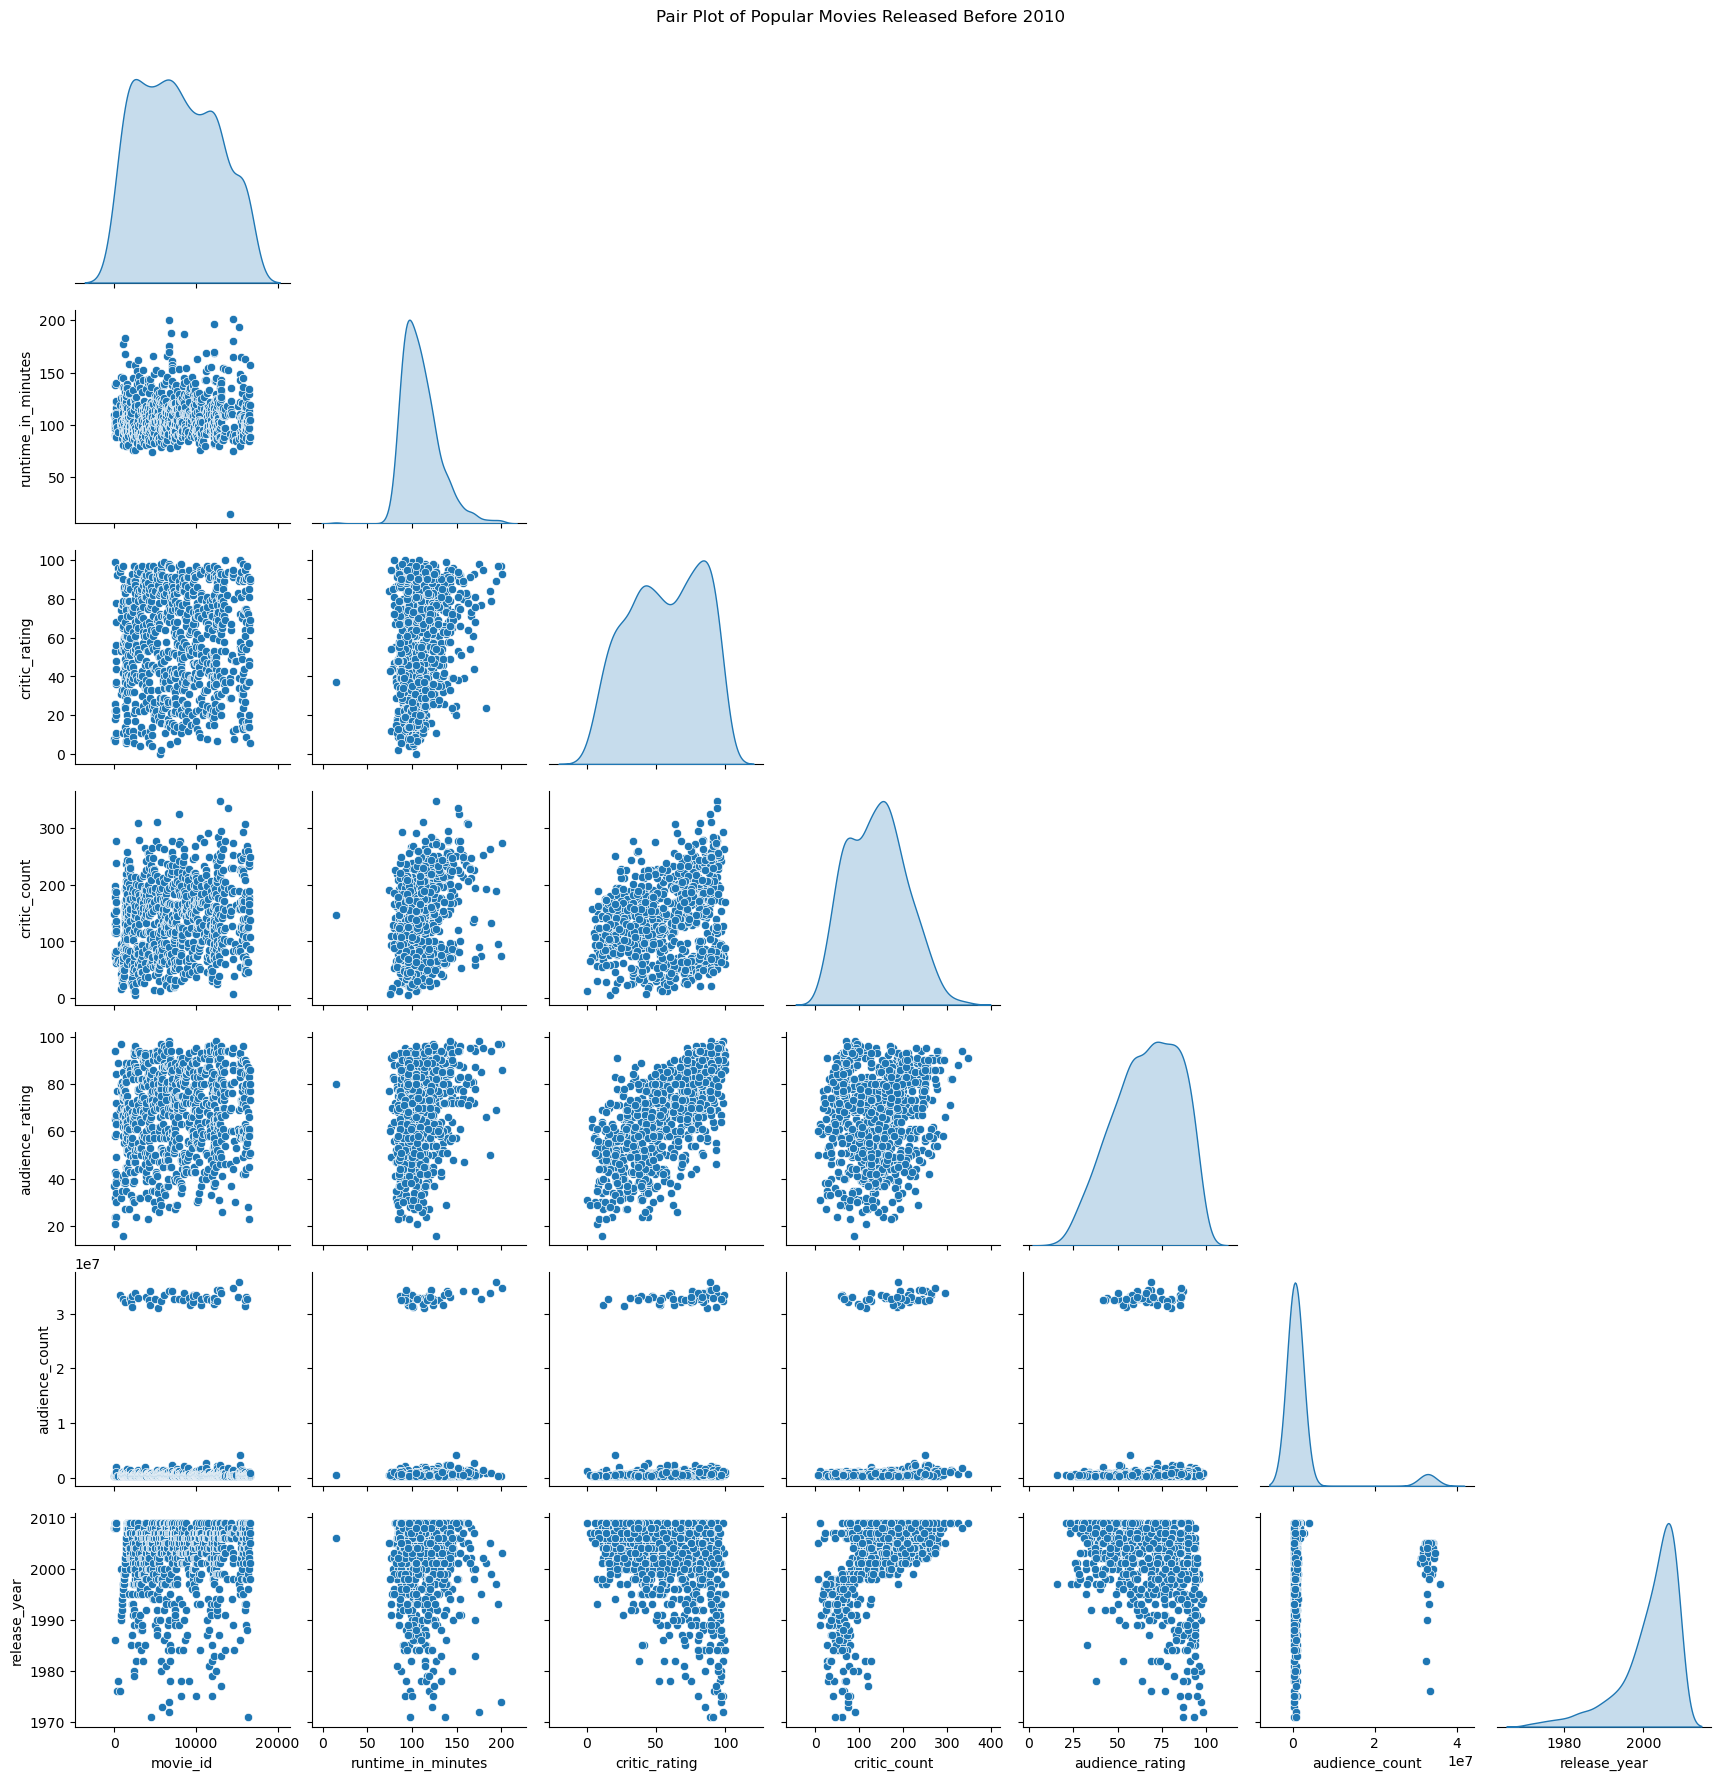

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pair plot for numeric columns in the DataFrame
sns.pairplot(popular_movies, diag_kind='kde', corner=True)
plt.suptitle('Pair Plot of Popular Movies Released Before 2010', y=1.02)
plt.show()


1.Audience Rating and Critic Rating are Positively Correlated
This means that when critics give higher ratings to a movie, audiences also tend to give it higher ratings. However, the correlation is not perfect—there are movies where critics and audiences disagree. This suggests that while critical acclaim can influence audience perceptions, some movies resonate differently with the general public compared to critics.

2.Most Movies’ Runtimes are Between 75 and 175 Minutes
The plot shows that the majority of movies fall into the 75-175 minute range, with very few shorter or longer films. This range likely reflects the standard movie length that appeals to both filmmakers and audiences, balancing storytelling depth and attention spans.

3.Most Movies Were Released After 2000
The release year distribution highlights that the majority of movies in the dataset are from the 21st century, with a sharp increase after 2000. This could reflect either a focus on more recent films in the dataset or the natural growth of the film industry and movie data availability in the digital age.

2.6

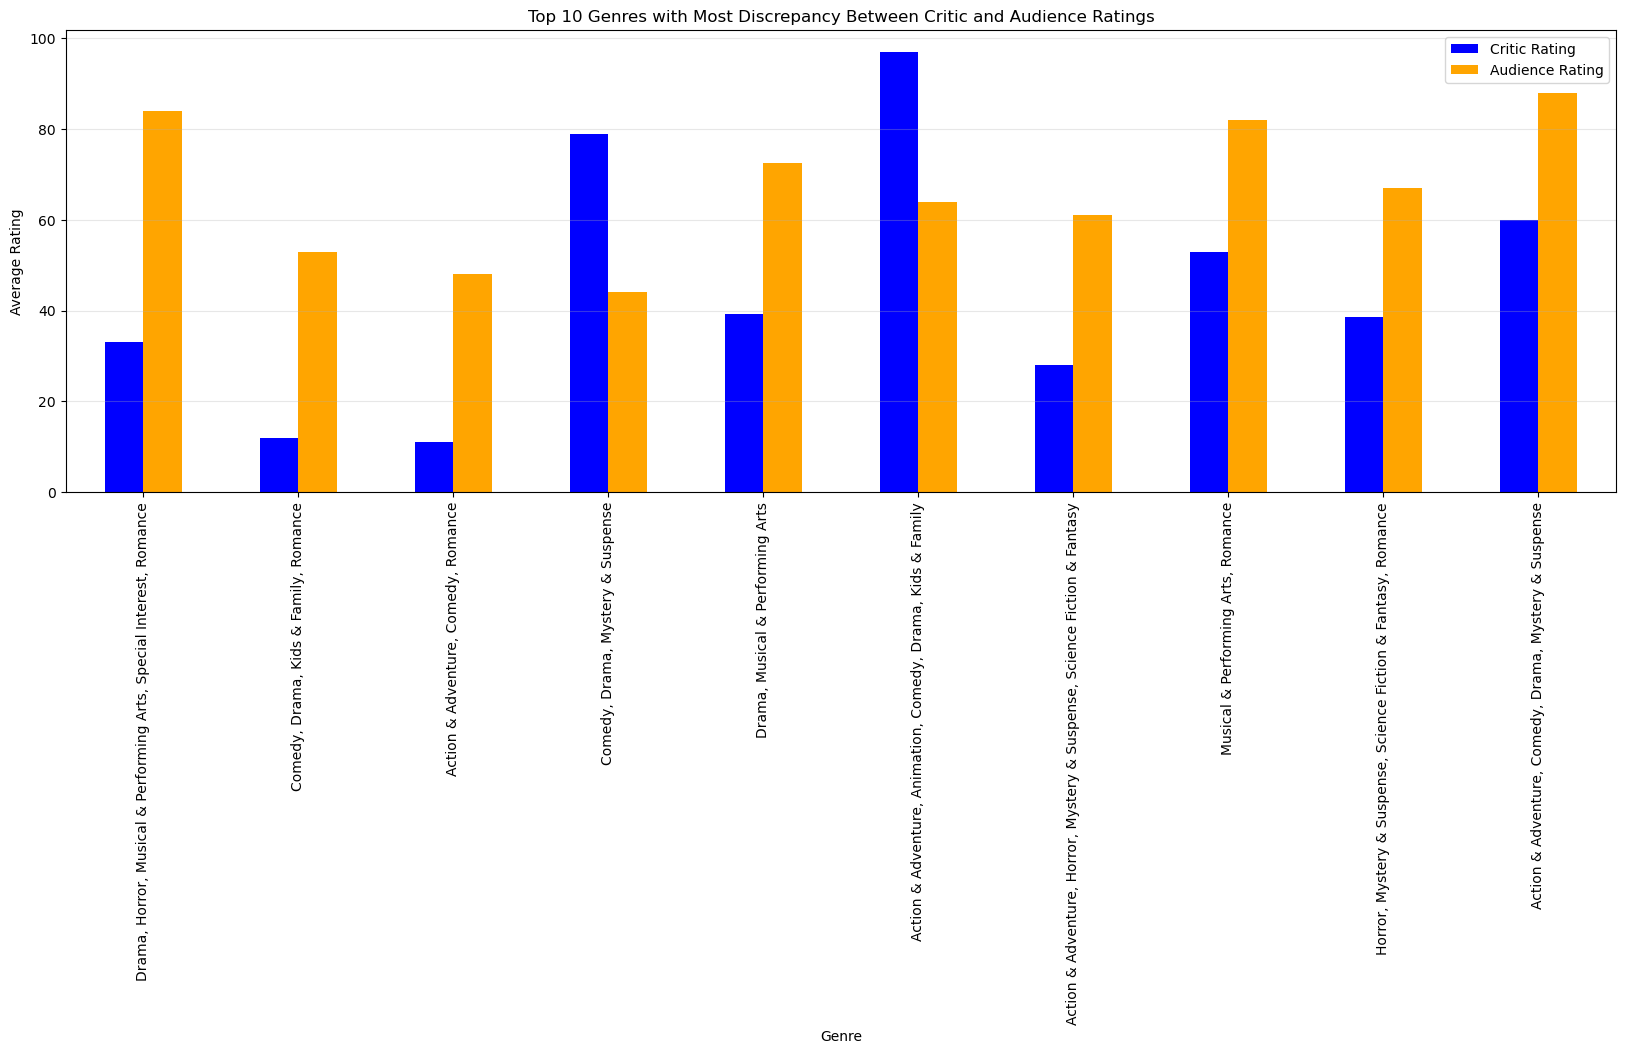

In [176]:
# Group by genre and calculate average critic and audience ratings
average_ratings_by_genre = popular_movies.groupby('genre')[['critic_rating', 'audience_rating']].mean()

# Calculate the absolute difference between critic and audience ratings
average_ratings_by_genre['rating_discrepancy'] = abs(average_ratings_by_genre['critic_rating'] - average_ratings_by_genre['audience_rating'])

# Sort by discrepancy and select the top 10 genres
top_10_discrepancy = average_ratings_by_genre.sort_values(by='rating_discrepancy', ascending=False).head(10)

# Reorder index for plotting (ensures the order reflects the discrepancy)
top_10_discrepancy = top_10_discrepancy.sort_values(by='rating_discrepancy', ascending=False)

# Plot the top 10 genres with the highest discrepancy
top_10_discrepancy[['critic_rating', 'audience_rating']].plot(kind='bar', figsize=(20, 6), color=['blue', 'orange'])
plt.title('Top 10 Genres with Most Discrepancy Between Critic and Audience Ratings')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.grid(axis='y', alpha=0.3)
#plt.xticks(rotation=45)
plt.legend(['Critic Rating', 'Audience Rating'])
plt.show()



The chart shows the top 10 genres where critics and audiences disagree the most. For example, genres like "Drama, Musical & Performing Arts, Romance" are rated much higher by critics than by audiences, meaning critics appreciate them more. On the other hand, genres like "Action & Adventure, Comedy, Romance" are loved more by audiences but not as much by critics. This shows that some genres appeal more to critics, while others are more enjoyable for the general audience.

<Figure size 1000x600 with 0 Axes>

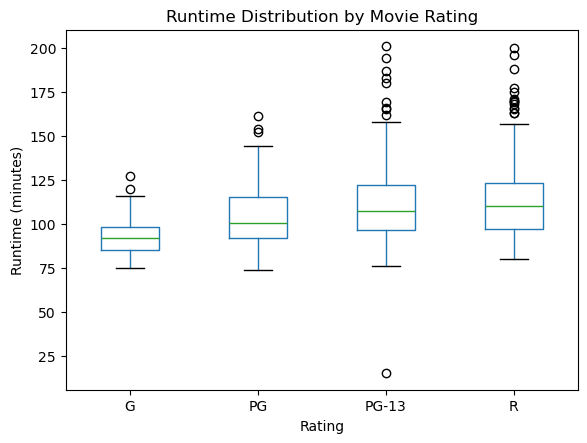

In [178]:
# Boxplot of runtime_in_minutes grouped by rating
plt.figure(figsize=(10, 6))
popular_movies.boxplot(column='runtime_in_minutes', by='rating', grid=False)
plt.title('Runtime Distribution by Movie Rating')
plt.suptitle('')
plt.xlabel('Rating')
plt.ylabel('Runtime (minutes)')
plt.show()


The boxplot shows that G-rated movies tend to have shorter runtimes, while PG-13 and R-rated movies are generally longer. This makes sense since G-rated movies are designed for younger audiences with shorter attention spans, whereas more mature content often involves longer and more complex storytelling. There are also more outliers in the runtimes for PG-13 and R-rated movies, reflecting greater variability in their length.

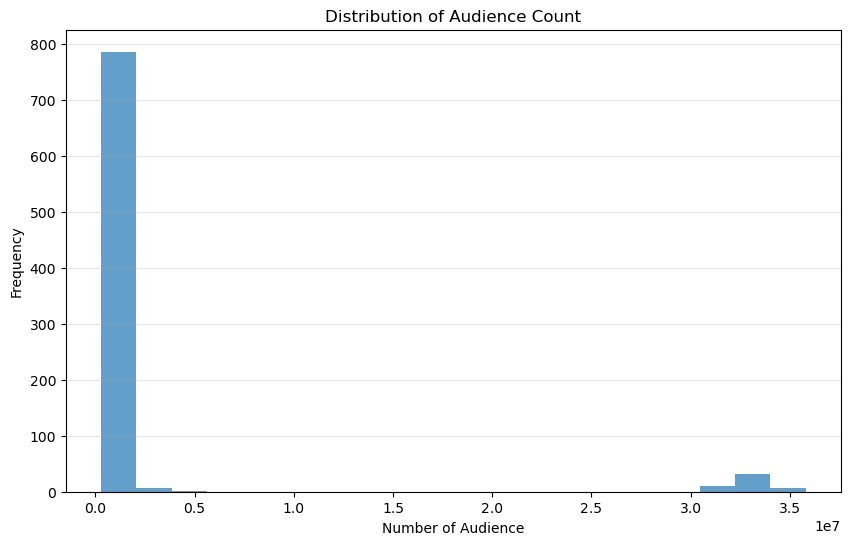

In [183]:
# Plot the distribution of audience reviews
popular_movies['audience_count'].plot(kind='hist', bins=20, figsize=(10, 6), alpha=0.7)
plt.title('Distribution of Audience Count')
plt.xlabel('Number of Audience')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.3)
plt.show()


The histogram shows the distribution of audience counts for movies. Most movies have a relatively low number of audience reviews, with the majority clustered in the lower range. However, there are a few extreme outliers with very high audience counts, likely representing blockbuster hits or highly popular films. This indicates that while most movies attract smaller, niche audiences, a small number of films capture widespread attention and dominate audience engagement.

3, 7

In [135]:
# Split the data into training and test sets based on the release year
training_data = movie_df_new[movie_df_new['release_year'] < 2010]
test_data = movie_df_new[movie_df_new['release_year'] >= 2010]

# Verify the split
print("Training Data Shape:", training_data.shape)
print("Test Data Shape:", test_data.shape)

Training Data Shape: (8204, 14)
Test Data Shape: (7619, 14)


3, 8

In [136]:
# Columns to exclude
columns_to_exclude = ['critic_rating', 'critic_count', 'audience_rating', 'audience_count', 'on_streaming_date']

# Update training and test datasets
training_data_features = training_data.drop(columns=columns_to_exclude)
test_data_features = test_data.drop(columns=columns_to_exclude)

X_test = test_data_features
X_train = training_data_features
y_train = training_data['critic_rating']
y_test = test_data['critic_rating']

# Verify the updated datasets
print("Training Features Shape:", training_data_features.shape)
print("Test Features Shape:", test_data_features.shape)

Training Features Shape: (8204, 9)
Test Features Shape: (7619, 9)


'critic_rating', 'critic_count', 'audience_rating', 'audience_count', 'on_streaming_date' should be removed. We need to remove these columns because they contain information that wouldn’t be available before the movie is released. For example, `critic_rating`, `critic_count`, `audience_rating`, and `audience_count` are only collected after the movie is reviewed or watched, so using them would cause data leakage and make the model unrealistic. Similarly, `on_streaming_date` is usually decided after the theatrical release and isn’t known beforehand. Including these columns would give the model an unfair advantage and wouldn’t work in real-life scenarios. By removing them, we ensure the model only uses information available before the movie’s release, making it practical and accurate.

In [137]:
training_data_features

,movie_id,movie_title,movie_info,rating,genre,directors,in_theaters_date,runtime_in_minutes,release_year
2,3,10,Blake Edwards' 10 stars Dudley Moore as George...,R,"Comedy, Romance",Blake Edwards,1979-10-05,118.0,1979.0
5,6,"10,000 B.C.",A young outcast from a primitive tribe is forc...,PG-13,"Action & Adventure, Classics, Drama",Roland Emmerich,2008-03-07,109.0,2008.0
8,9,Charly (A Heartbeat Away),Sam Roberts thinks he has all the answers: the...,PG,"Comedy, Drama, Romance",Adam Thomas Anderegg,2002-09-27,103.0,2002.0
10,19,The Adventures of Mark Twain,"Will Vinton, the stop-motion animation whiz wh...",G,"Action & Adventure, Animation, Kids & Family",Will Vinton,1985-03-01,86.0,1985.0
11,11,Dark Water,Following up on his horror smash hits Ringu an...,PG-13,"Art House & International, Horror, Mystery & S...",Hideo Nakata,2002-01-19,100.0,2002.0
...,...,...,...,...,...,...,...,...,...
16627,16627,Zombieland,A cowardly shut-in named Columbus (Jesse Eisen...,R,"Comedy, Horror",Ruben Fleischer,2009-10-02,88.0,2009.0
16628,16628,ZMD: Zombies of Mass Destruction,A small town wrestling with xenophobia is forc...,R,"Comedy, Horror",Kevin Hamedani,2009-04-18,89.0,2009.0
16631,16631,Zoolander,"Comic actor Ben Stiller co-wrote, directed, an...",PG-13,"Comedy, Special Interest",Ben Stiller,2001-09-28,105.0,2001.0
16633,16633,Zoom,Former superhero Jack is called back to work t...,PG,"Action & Adventure, Comedy, Kids & Family",Peter Hewitt,2006-08-11,88.0,2006.0


3, 9

In [138]:

# Split Genres 
training_data_features['genre_split'] = training_data_features['genre'].str.split(',')

exploded_genres = training_data_features.explode('genre_split')

exploded_genres['genre_split'] = exploded_genres['genre_split'].str.strip()

genre_dummies = pd.get_dummies(exploded_genres['genre_split'], prefix='genre')

genre_dummies_grouped = genre_dummies.groupby(exploded_genres.index).sum()

# Kid friendly
training_data_features['kid_friendly'] = training_data_features['rating'].apply(lambda x: 1 if x in ['G', 'PG'] else 0)

new_training_data = pd.concat([
    training_data_features[['movie_title', 'runtime_in_minutes', 'kid_friendly']],
    genre_dummies_grouped
], axis=1)

# Verify the new DataFrame
new_training_data.head()


,movie_title,runtime_in_minutes,kid_friendly,genre_Action & Adventure,genre_Animation,genre_Anime & Manga,genre_Art House & International,genre_Classics,genre_Comedy,genre_Cult Movies,...,genre_Horror,genre_Kids & Family,genre_Musical & Performing Arts,genre_Mystery & Suspense,genre_Romance,genre_Science Fiction & Fantasy,genre_Special Interest,genre_Sports & Fitness,genre_Television,genre_Western
2,10,118.0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
5,"10,000 B.C.",109.0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Charly (A Heartbeat Away),103.0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
10,The Adventures of Mark Twain,86.0,1,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
11,Dark Water,100.0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0


3，10

I feature engineered directors. For directors that shot the most movies of top 10, I mark them as 1 else 0. So I can know which movie is shot by famous and popular directors.

In [139]:
# Combine the directors from training and test datasets
all_directors = pd.concat([training_data_features['directors'], X_test['directors']])

# Calculate the number of movies per director across both datasets
director_movie_count = all_directors.value_counts()

# Identify the top 10 directors by movie count
top_10_directors = director_movie_count.nlargest(10).index

# Map top 10 directors to 1, and others to 0 in training data
training_data_features['director_popularity'] = training_data_features['directors'].apply(
    lambda x: 1 if x in top_10_directors else 0
)


I created the rated feature. Some movies have rating and some do not. This would help because we can identify whether a rated movie influence the rating.

In [140]:
# Create the 'rated' feature based on whether the 'rating' column is NaN
training_data_features['rated'] = training_data_features['rating'].apply(lambda x: 0 if pd.isna(x) else 1)

I created `winter_or_not` feature because I assume Christmas season have the most heated movie market. So identifying it would help predict the critic rating. And movies could have seasonality.

In [141]:
# Map months to seasons
def get_season(release_date):
    month = release_date.month
    if month in [12, 1, 2]:
        return 'winter'
    elif month in [3, 4, 5]:
        return 'spring'
    elif month in [6, 7, 8]:
        return 'summer'
    else:
        return 'fall'

# Map release dates to seasons
training_data_features['release_season'] = training_data_features['in_theaters_date'].apply(get_season)

# Create a binary column `spring_or_not`
training_data_features['winter_or_not'] = training_data_features['release_season'].apply(lambda x: 1 if x == 'winter' else 0)

In [142]:
# Update the new_training_data with the additional features
new_training_data_add = pd.concat([
    new_training_data,
    training_data_features[['director_popularity','winter_or_not', 'rated']],
    runtime_dummies,
], axis=1)

# Verify the updated DataFrame
new_training_data_add

X_train = new_training_data_add

X_train

,movie_title,runtime_in_minutes,kid_friendly,genre_Action & Adventure,genre_Animation,genre_Anime & Manga,genre_Art House & International,genre_Classics,genre_Comedy,genre_Cult Movies,...,genre_Special Interest,genre_Sports & Fitness,genre_Television,genre_Western,director_popularity,winter_or_not,rated,runtime_long,runtime_short,runtime_standard
2,10,118.0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,1,False,False,True
5,"10,000 B.C.",109.0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,False,False,True
8,Charly (A Heartbeat Away),103.0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,False,False,True
10,The Adventures of Mark Twain,86.0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,False,True,False
11,Dark Water,100.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,1,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16627,Zombieland,88.0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,False,True,False
16628,ZMD: Zombies of Mass Destruction,89.0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,False,True,False
16631,Zoolander,105.0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,1,False,False,True
16633,Zoom,88.0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,False,True,False


3, 11

In [143]:
# Step 1: Split the 'genre' column by comma and strip extra whitespace
X_test['genre_split'] = X_test['genre'].str.split(',')

# Explode the genres into separate rows for proper one-hot encoding
exploded_genres_test = X_test.explode('genre_split')

# Strip leading/trailing whitespace from genre entries
exploded_genres_test['genre_split'] = exploded_genres_test['genre_split'].str.strip()

# Create dummy variables for the exploded 'genre_split' column
genre_dummies_test = pd.get_dummies(exploded_genres_test['genre_split'], prefix='genre')

# Group the dummy variables back by movie and sum to consolidate duplicates
genre_dummies_grouped_test = genre_dummies_test.groupby(exploded_genres_test.index).sum()

# Step 2: Add the `kid_friendly` column to test data
X_test['kid_friendly'] = X_test['rating'].apply(lambda x: 1 if x in ['G', 'PG'] else 0)

# Step 3: Categorize runtime into bins
X_test['runtime_category'] = X_test['runtime_in_minutes'].apply(categorize_runtime)

# Create the 'rated' feature for the test data
X_test['rated'] = X_test['rating'].apply(lambda x: 0 if pd.isna(x) else 1)


# Create dummy variables for runtime_category
runtime_dummies_test = pd.get_dummies(X_test['runtime_category'], prefix='runtime')

X_test['release_season'] = X_test['in_theaters_date'].apply(get_season)
X_test['winter_or_not'] = X_test['release_season'].apply(lambda x: 1 if x == 'winter' else 0)

# Map top 10 directors to 1, and others to 0 in test data
X_test['director_popularity'] = X_test['directors'].apply(
    lambda x: 1 if x in top_10_directors else 0
)

# Step 6: Combine all features
X_test_transformed = pd.concat([
    X_test[['movie_title', 'runtime_in_minutes', 'kid_friendly', 'director_popularity','winter_or_not', 'rated']],
    genre_dummies_grouped_test,
    runtime_dummies_test,

], axis=1)

# Step 7: Ensure consistent columns with X_train
missing_cols = set(new_training_data_add.columns) - set(X_test_transformed.columns)
for col in missing_cols:
    X_test_transformed[col] = 0

# Reorder columns to match X_train
X_test = X_test_transformed[new_training_data_add.columns]


In [144]:
X_test

,movie_title,runtime_in_minutes,kid_friendly,genre_Action & Adventure,genre_Animation,genre_Anime & Manga,genre_Art House & International,genre_Classics,genre_Comedy,genre_Cult Movies,...,genre_Special Interest,genre_Sports & Fitness,genre_Television,genre_Western,director_popularity,winter_or_not,rated,runtime_long,runtime_short,runtime_standard
0,Percy Jackson & the Olympians: The Lightning T...,83.0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,1,1,False,True,False
1,Please Give,90.0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,False,False,True
3,12 Angry Men (Twelve Angry Men),95.0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,False,False,True
4,"20,000 Leagues Under The Sea",127.0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,False,False,True
6,The 39 Steps,87.0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16630,Zookeeper,101.0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,False,False,True
16632,Zoolander 2,102.0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,1,False,False,True
16634,Zootopia,108.0,1,1,1,0,0,0,1,0,...,0,0,0,0,0,0,1,False,False,True
16635,Zorba the Greek,142.0,0,1,0,0,1,1,0,0,...,0,0,0,0,0,1,0,False,False,True


3, 12

In [145]:
# Combine X_train and y_train to ensure consistent dropping
train_combined = pd.concat([X_train, y_train], axis=1)

train_combined_clean = train_combined.dropna()

X_train_clean = train_combined_clean.drop(columns=y_train.name)  # Exclude target column
y_train_clean = train_combined_clean[y_train.name]  # Target column only

test_combined = pd.concat([X_test, y_test], axis=1)

test_combined_clean = test_combined.dropna()

# Split back
X_test_clean = test_combined_clean.drop(columns=y_test.name)  # Exclude target column
y_test_clean = test_combined_clean[y_test.name]  # Target column only


This method makes sure that both the features and the target values are clean and match up correctly. By combining `X_train` and `y_train` (and the same for the test set), we can drop any rows that have missing values in either the features or the target. This avoids problems like having a missing value that could mess up training or testing. Dropping rows with missing values is simple and works well if there aren’t too many missing rows compared to the size of the dataset. It ensures the model works with complete and reliable data, which is important for better performance and accuracy.

In [146]:
X_test_clean

,movie_title,runtime_in_minutes,kid_friendly,genre_Action & Adventure,genre_Animation,genre_Anime & Manga,genre_Art House & International,genre_Classics,genre_Comedy,genre_Cult Movies,...,genre_Special Interest,genre_Sports & Fitness,genre_Television,genre_Western,director_popularity,winter_or_not,rated,runtime_long,runtime_short,runtime_standard
0,Percy Jackson & the Olympians: The Lightning T...,83.0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,1,1,False,True,False
1,Please Give,90.0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,False,False,True
3,12 Angry Men (Twelve Angry Men),95.0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,False,False,True
4,"20,000 Leagues Under The Sea",127.0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,False,False,True
6,The 39 Steps,87.0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16630,Zookeeper,101.0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,False,False,True
16632,Zoolander 2,102.0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,1,False,False,True
16634,Zootopia,108.0,1,1,1,0,0,0,1,0,...,0,0,0,0,0,0,1,False,False,True
16635,Zorba the Greek,142.0,0,1,0,0,1,1,0,0,...,0,0,0,0,0,1,0,False,False,True


3, 13

In [147]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Model 1: Use only `runtime_in_minutes`
X_train_model1 = X_train_clean[['runtime_in_minutes']]
X_test_model1 = X_test_clean[['runtime_in_minutes']]

# Initialize and fit Model 1
model1 = LinearRegression()
model1.fit(X_train_model1, y_train_clean)

# Predict and evaluate Model 1
y_pred_model1 = model1.predict(X_test_model1)
mse_model1 = mean_squared_error(y_test_clean, y_pred_model1)
r2_model1 = r2_score(y_test_clean, y_pred_model1)


# Model 2: Use `runtime_in_minutes` and `kid_friendly`
X_train_model2 = X_train_clean[['runtime_in_minutes', 'kid_friendly']]
X_test_model2 = X_test_clean[['runtime_in_minutes', 'kid_friendly']]

# Initialize and fit Model 2
model2 = LinearRegression()
model2.fit(X_train_model2, y_train_clean)

# Predict and evaluate Model 2
y_pred_model2 = model2.predict(X_test_model2)
mse_model2 = mean_squared_error(y_test_clean, y_pred_model2)
r2_model2 = r2_score(y_test_clean, y_pred_model2)


# Model 3: Use `runtime_in_minutes`, `kid_friendly`, and genre dummies
genre_columns = [col for col in X_train_clean.columns if col.startswith('genre_')]
X_train_model3 = X_train_clean[['runtime_in_minutes', 'kid_friendly'] + genre_columns]
X_test_model3 = X_test_clean[['runtime_in_minutes', 'kid_friendly'] + genre_columns]

# Initialize and fit Model 3
model3 = LinearRegression()
model3.fit(X_train_model3, y_train_clean)

# Predict and evaluate Model 3
y_pred_model3 = model3.predict(X_test_model3)
mse_model3 = mean_squared_error(y_test_clean, y_pred_model3)
r2_model3 = r2_score(y_test_clean, y_pred_model3)


In [148]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

def evaluate_model(y_test, y_pred):
    """
    Evaluate model performance using R2, MAE, and RMSE metrics.

    Parameters:
    - y_test: True values for the target variable
    - y_pred: Predicted values from the model

    Returns:
    - A dictionary with R2, MAE, and RMSE metrics
    """
    r2 = r2_score(y_test, y_pred)  # R-squared
    mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Root Mean Squared Error
    
    return {"R2": r2, "MAE": mae, "RMSE": rmse}


In [149]:
metrics_model1 = evaluate_model(y_test_clean, y_pred_model1)
print("Model 1 Metrics:", metrics_model1)

Model 1 Metrics: {'R2': -0.10026432801423324, 'MAE': 26.21950889140841, 'RMSE': 29.66127570123874}


In [150]:
metrics_model2 = evaluate_model(y_test_clean, y_pred_model2)
print("Model 2 Metrics:", metrics_model2)

Model 2 Metrics: {'R2': -0.10065606268476457, 'MAE': 26.23050724044742, 'RMSE': 29.666555485252157}


In [151]:
metrics_model3 = evaluate_model(y_test_clean, y_pred_model3)
print("Model 3 Metrics:", metrics_model3)

Model 3 Metrics: {'R2': 0.1305460833925255, 'MAE': 22.462757068039707, 'RMSE': 26.367235209573757}


3， 15

In [152]:
import statsmodels.api as sm
# Add a constant for the intercept term
X_train_model1_const = sm.add_constant(X_train_model1)

# Fit the model using statsmodels
model1_stats = sm.OLS(y_train_clean, X_train_model1_const).fit()

# Print the summary for p-values and coefficients
print("Model 1 Summary:")
print(model1_stats.summary())


Model 1 Summary:
                            OLS Regression Results                            
Dep. Variable:          critic_rating   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     104.3
Date:                Wed, 04 Dec 2024   Prob (F-statistic):           2.42e-24
Time:                        14:54:37   Log-Likelihood:                -38943.
No. Observations:                8202   AIC:                         7.789e+04
Df Residuals:                    8200   BIC:                         7.790e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              

In [153]:
# Add a constant for the intercept term
X_train_model2_const = sm.add_constant(X_train_model2)

# Fit the model using statsmodels
model2_stats = sm.OLS(y_train_clean, X_train_model2_const).fit()

# Print the summary for p-values and coefficients
print("\nModel 2 Summary:")
print(model2_stats.summary())



Model 2 Summary:
                            OLS Regression Results                            
Dep. Variable:          critic_rating   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     53.98
Date:                Wed, 04 Dec 2024   Prob (F-statistic):           5.14e-24
Time:                        14:54:37   Log-Likelihood:                -38942.
No. Observations:                8202   AIC:                         7.789e+04
Df Residuals:                    8199   BIC:                         7.791e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const             

In [154]:
# Add a constant for the intercept term
X_train_model3_const = sm.add_constant(X_train_model3)

# Fit the model using statsmodels
model3_stats = sm.OLS(y_train_clean, X_train_model3_const).fit()

# Print the summary for p-values and coefficients
print("\nModel 3 Summary:")
print(model3_stats.summary())



Model 3 Summary:
                            OLS Regression Results                            
Dep. Variable:          critic_rating   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     83.17
Date:                Wed, 04 Dec 2024   Prob (F-statistic):               0.00
Time:                        14:54:37   Log-Likelihood:                -38133.
No. Observations:                8202   AIC:                         7.631e+04
Df Residuals:                    8178   BIC:                         7.648e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

The third model performs the best so far, with the highest R² of 0.13. From the first model, we see that `runtime_in_minutes` is a significant predictor. While `kid_friendly` is not significant in the second model, it becomes significant in the third model when combined with genre variables. This makes sense because the impact of a movie being "kid-friendly" likely depends on the type of genre, as certain genres (like Animation or Family) align more with kid-friendly content, strengthening its predictive power in a genre-inclusive model.

3，16

In [165]:
# Model 4: runtime_in_minutes, kid_friendly, and director_popularity
runtime_columns = [col for col in X_train_clean.columns if col.startswith('runtime_')]
X_train_model4 = X_train_clean[['runtime_in_minutes', 'kid_friendly', 'director_popularity'] + genre_columns]
X_test_model4 = X_test_clean[['runtime_in_minutes', 'kid_friendly','director_popularity'] + genre_columns]

# Initialize and fit Model 4
model4 = LinearRegression()
model4.fit(X_train_model4, y_train_clean)

# Predict and evaluate Model 4
y_pred_model4 = model4.predict(X_test_model4)
metrics_model4 = evaluate_model(y_test_clean, y_pred_model4)

print("Model 4 Metrics:", metrics_model4)


Model 4 Metrics: {'R2': 0.13086158683563576, 'MAE': 22.44433131459751, 'RMSE': 26.3624507649023}


I will keep all variable from model3 because they do a good job predicting. I add director_popularity into the model, it performs better than model3, therefore, this variable helps the model in R^2. So in next model I decide to keep it.

In [166]:
# Model 5: runtime_in_minutes, kid_friendly, director_popularity, and runtime_category dummies
runtime_columns = [col for col in X_train_clean.columns if col.startswith('runtime_')]
X_train_model5 = X_train_clean[['runtime_in_minutes', 'kid_friendly', 'director_popularity', 'winter_or_not'] + genre_columns]
X_test_model5 = X_test_clean[['runtime_in_minutes', 'kid_friendly','director_popularity', 'winter_or_not'] + genre_columns]

# Initialize and fit Model 5
model5 = LinearRegression()
model5.fit(X_train_model5, y_train_clean)

# Predict and evaluate Model 5
y_pred_model5 = model5.predict(X_test_model5)
metrics_model5 = evaluate_model(y_test_clean, y_pred_model5)

print("Model 5 Metrics:", metrics_model5)

Model 5 Metrics: {'R2': 0.13018724311823615, 'MAE': 22.454296340789128, 'RMSE': 26.37267577961837}


After adding the 'winter_or_not', the r^2 decreases, so this variable doesn't help explaining the variance, I will not include it into my final model.

In [167]:
# Model 6: 
X_train_model6 = X_train_clean[['runtime_in_minutes', 'kid_friendly', 'rated', 'director_popularity'] + genre_columns]
X_test_model6 = X_test_clean[['runtime_in_minutes', 'kid_friendly', 'rated',  'director_popularity'] + genre_columns]

# Initialize and fit Model 6
model6 = LinearRegression()
model6.fit(X_train_model6, y_train_clean)

# Predict and evaluate Model 6
y_pred_model6 = model6.predict(X_test_model6)
metrics_model6 = evaluate_model(y_test_clean, y_pred_model6)

print("Model 6 Metrics:", metrics_model6)


Model 6 Metrics: {'R2': 0.18715958185689496, 'MAE': 21.48299024938603, 'RMSE': 25.494350634515314}


After adding 'rated' and removing seasonal variable 'winter_or_not', it performs the best with the highest R^2 of 0.187, showing this model helps explain the most variance.

17

In [168]:
# Add a constant for the intercept term
X_train_model4_const = sm.add_constant(X_train_model4)

# Fit the model using statsmodels
model4_stats = sm.OLS(y_train_clean, X_train_model4_const).fit()

# Print the summary for p-values and coefficients
print("Model 4 Summary:")
print(model4_stats.summary())

Model 4 Summary:
                            OLS Regression Results                            
Dep. Variable:          critic_rating   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     82.19
Date:                Wed, 04 Dec 2024   Prob (F-statistic):               0.00
Time:                        14:58:52   Log-Likelihood:                -38109.
No. Observations:                8202   AIC:                         7.627e+04
Df Residuals:                    8177   BIC:                         7.644e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [169]:
# Add a constant for the intercept term
X_train_model5_const = sm.add_constant(X_train_model5)

# Fit the model using statsmodels
model5_stats = sm.OLS(y_train_clean, X_train_model5_const).fit()

# Print the summary for p-values and coefficients
print("Model 5 Summary:")
print(model5_stats.summary())

Model 5 Summary:
                            OLS Regression Results                            
Dep. Variable:          critic_rating   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     78.95
Date:                Wed, 04 Dec 2024   Prob (F-statistic):               0.00
Time:                        14:59:34   Log-Likelihood:                -38108.
No. Observations:                8202   AIC:                         7.627e+04
Df Residuals:                    8176   BIC:                         7.645e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [170]:
# Add a constant for the intercept term
X_train_model6_const = sm.add_constant(X_train_model6)

# Fit the model using statsmodels
model6_stats = sm.OLS(y_train_clean, X_train_model6_const).fit()

# Print the summary for p-values and coefficients
print("Model 6 Summary:")
print(model6_stats.summary())

Model 6 Summary:
                            OLS Regression Results                            
Dep. Variable:          critic_rating   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     81.54
Date:                Wed, 04 Dec 2024   Prob (F-statistic):               0.00
Time:                        15:00:40   Log-Likelihood:                -38082.
No. Observations:                8202   AIC:                         7.622e+04
Df Residuals:                    8176   BIC:                         7.640e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In summary, the last model performs the best because it has the highest R^2 and lowest MAE and RMSE. In model4, we know that feature 'runtime_in_minutes', 'kid_friendly', 'director_popularity' and genre as whole do a good job. From model5, 'winter_or_not' is not a good feature in predicting. From the model 6 we know that 'rated' did a good job. So 'runtime_in_minutes', 'kid_friendly', 'director_popularity','rated', and genre do a good job in predicting. 

18

1. **Get more data from other APIs or sources**:  
   One of the simplest ways to improve my model is by adding more data. More data gives the model more examples to learn from, which can help it generalize better. For example, I could pull additional details about movies like budget or box office revenue from APIs like The Movie Database. These new data points might introduce features that are strongly related to `critic_rating` and could improve predictions. It’s also possible that more diverse data helps balance any biases present in my current dataset. Expanding the dataset ensures that my model has a better understanding of different types of movies and how critics respond to them.

2. **Feature Engineering**:  
   Feature engineering involves creating new features from existing ones to give the model more meaningful information. For example, I could create an interaction feature between `kid_friendly` and certain genres to better capture how critics might view kid-friendly movies differently by genre. I could also group smaller, less common genres into a single “Other” category to reduce noise. By applying feature engineering, I can provide the model with better inputs, which will likely lead to higher accuracy and improved predictions.

3. **Model Exploration**:  
   Trying out different types of models can also help improve performance. Right now, I am using linear regression, but I could explore more advanced models like Random Forests or Gradient Boosting. These models can capture non-linear relationships and interactions between variables that linear regression might miss. 